# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

(25, 28, 28, 1)


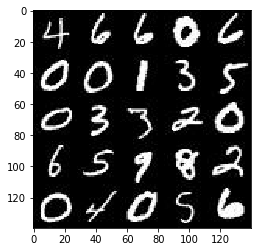

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

data_dir = './data'
import helper

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
print(mnist_images.shape)
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

(25, 28, 28, 3)


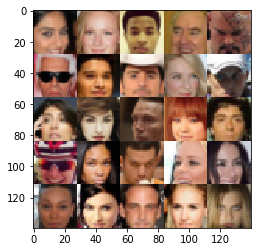

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
print(mnist_images.shape)
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    
    # TODO: Implement Function
    inputs = tf.placeholder(tf.float32, [None,image_width, image_height, image_channels])
    z = tf.placeholder(tf.float32, [None,z_dim])
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    return (inputs, z, learning_rate)

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [50]:
def discriminator(images, reuse=False):
    
    # TODO: Implement Function
    
    alpha = 0.15
    kernel = 5
    strides = 2
    padding = 'same'
    training = reuse
    #out_channel_dim = [64,128,256]
    out_channel_dim = [128,256,512]
    rate = 0.5
    
    with tf.variable_scope('discriminator', reuse=reuse):
        
        # Input layer is 28x28x3
        x1 = tf.layers.conv2d(images, out_channel_dim[0], kernel, strides=strides, padding=padding,
                    kernel_initializer= tf.contrib.layers.xavier_initializer_conv2d())
        relu1 = tf.maximum(alpha * x1, x1)
        # 14x14x64
        
       
        
        x2 = tf.layers.conv2d(relu1, out_channel_dim[1], kernel, strides=strides, padding=padding,
                    kernel_initializer= tf.contrib.layers.xavier_initializer_conv2d())
        bn2 = tf.layers.batch_normalization(x2, training= training)
        # Dropout
        bn2=tf.layers.dropout(bn2,rate)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 7x7x128
        
        x3 = tf.layers.conv2d(relu2, out_channel_dim[2], kernel, strides=strides, padding=padding,
                    kernel_initializer= tf.contrib.layers.xavier_initializer_conv2d())
        bn3 = tf.layers.batch_normalization(x3, training= training)
        # Dropout
        bn3=tf.layers.dropout(bn3,rate)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256
        
        # Flatten it
        W,H,D  = relu3.shape.as_list()[1:]
        flat = tf.reshape(relu3, (-1, W*H*D))
      
        logits = tf.layers.dense(flat, 1, kernel_initializer=tf.contrib.layers.xavier_initializer())
        
        out = tf.sigmoid(logits)
        
        
        return (out, logits)
    

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [51]:
def generator(z, out_channel_dim, is_train=True):

    # TODO: Implement Function
    
    alpha = 0.15
    kernel = 5
    strides = 2
    padding = 'same'
    #out_dim = [256,128,64,out_channel_dim]
    out_dim = [512,256,128,out_channel_dim]
    rate = 0.5
    
    with tf.variable_scope('generator', reuse= not is_train):
        W,H= [7,7]
        # First fully connected layer
        x1 = tf.layers.dense(z, W*H* out_dim[0], kernel_initializer=tf.contrib.layers.xavier_initializer() )
        
        
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, W, H, out_dim[0]))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        #  Dropout
        x1 = tf.layers.dropout(x1, rate, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 7x7x256 now
        
    
        x2 = tf.layers.conv2d_transpose(x1, out_dim[1], kernel, strides=strides, padding=padding,
                    kernel_initializer= tf.contrib.layers.xavier_initializer_conv2d())
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        #  Dropout
        x2 = tf.layers.dropout(x2, rate, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 14x14x128 now
        
        
        x3 = tf.layers.conv2d_transpose(x2, out_dim[2], kernel, strides=strides, padding=padding,
                    kernel_initializer= tf.contrib.layers.xavier_initializer_conv2d())
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        #  Dropout
        x3 = tf.layers.dropout(x3, rate, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        # 28x28x64 now
        
        
        #x3 = tf.reshape(x3, (-1, 14, 14, out_dim[2]))
        # 14x14x64 now
        
        # Output layer
        # set strides  to 1 to make logit shape same as x3
        logits = tf.layers.conv2d_transpose(x3, out_dim[3], kernel, strides=1, padding=padding,
                    kernel_initializer= tf.contrib.layers.xavier_initializer_conv2d())
        # 28x28x5 now
        
        
        out = tf.tanh(logits)
        
        return out
        
         


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [52]:
def model_loss(input_real, input_z, out_channel_dim):

    # TODO: Implement Function
    smooth = 0.1
    
    g_model = generator(input_z, out_channel_dim)
    
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_logits_real)* (1.0 - smooth)))
    
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_logits_fake)))
    
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_logits_fake)))
    
    '''
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)* (1.0 - smooth)))
    
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    '''
    
    d_loss = d_loss_real + d_loss_fake
    
    return  (d_loss, g_loss)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [53]:
def model_opt(d_loss, g_loss, learning_rate, beta1):

    # TODO: Implement Function
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
  
    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt
    
    #return (discriminator_training_operation, generator_training_operation)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [54]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [55]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    out_channel_dim = 1 if data_image_mode=='L' else 3
        
    image_width, image_height, image_channels= data_shape[1:]
        
    input_real, input_z,learning_rate_t=model_inputs(image_width, image_height, image_channels, z_dim) 
        
    d_loss, g_loss = model_loss(input_real, input_z, out_channel_dim) 
    
    d_train_opt, g_train_opt= model_opt(d_loss, g_loss, learning_rate, beta1)
    
    #saver = tf.train.Saver()
    
    z_size = z_dim
    
    steps = 0
    
    with tf.Session() as sess:
        # Sample random noise for G
        #batch_z = np.random.uniform(-1.0, 1.0, size=(batch_size, z_size))
        
        sess.run(tf.global_variables_initializer())
       
        for epoch_i in range(epoch_count):
            
            
            for batch_images in get_batches(batch_size):
                steps += 1
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1.0, 1.0, size=(batch_size, z_size))
            
                ###   Run optimizers
                #     Double the images to get better result
                batch_images *= 2
                
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_train_opt, feed_dict={input_z: batch_z,input_real: batch_images})
             
                
                if steps % 100 == 0:
                    # image_mode= data_image_mode
                    # n_images = batch_size
                    #show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode)
                    show_generator_output(sess, batch_size, input_z, out_channel_dim, data_image_mode)
                
                    # At the end of 100 batches, get the losses and print them out
                    #train_loss_d = sess.run(d_loss, {input_z: batch_z, input_real: batch_images})
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})
                    
                    print("Epoch {}/{}...".format( epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
           
                
        print('Done.................')

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

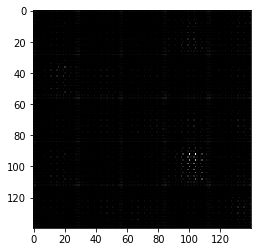

Epoch 1/2... Discriminator Loss: 0.3274... Generator Loss: 13.9730


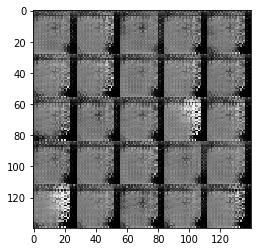

Epoch 1/2... Discriminator Loss: 0.3294... Generator Loss: 13.4110


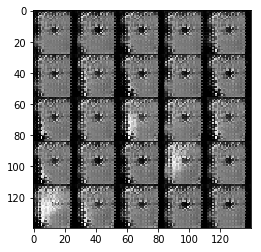

Epoch 1/2... Discriminator Loss: 0.3405... Generator Loss: 11.2227


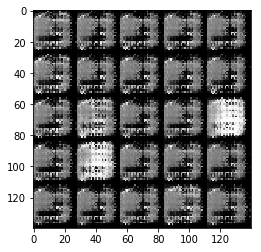

Epoch 1/2... Discriminator Loss: 0.3261... Generator Loss: 10.7525


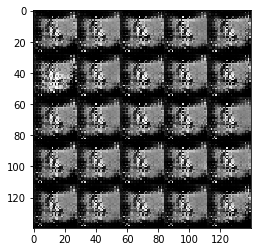

Epoch 1/2... Discriminator Loss: 0.3300... Generator Loss: 10.9335


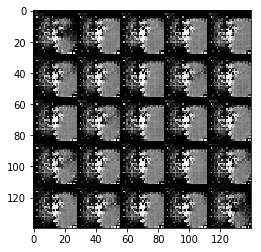

Epoch 1/2... Discriminator Loss: 0.3256... Generator Loss: 12.0322


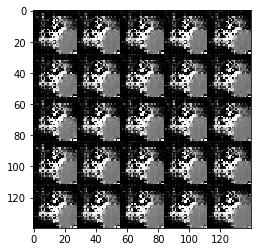

Epoch 1/2... Discriminator Loss: 0.3315... Generator Loss: 12.0703


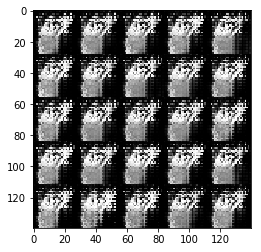

Epoch 1/2... Discriminator Loss: 0.3255... Generator Loss: 11.9038


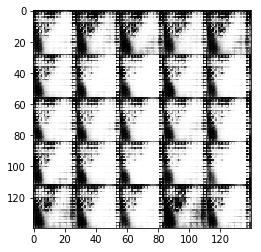

Epoch 1/2... Discriminator Loss: 2.1800... Generator Loss: 0.4188


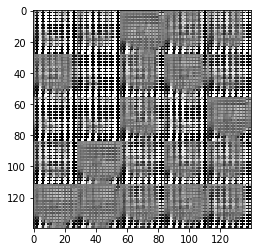

Epoch 1/2... Discriminator Loss: 0.3699... Generator Loss: 3.4632


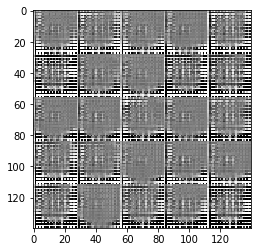

Epoch 1/2... Discriminator Loss: 0.3397... Generator Loss: 5.6718


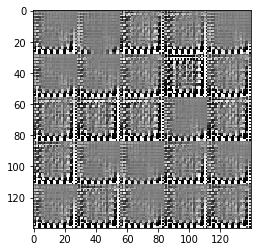

Epoch 2/2... Discriminator Loss: 0.3358... Generator Loss: 5.8244


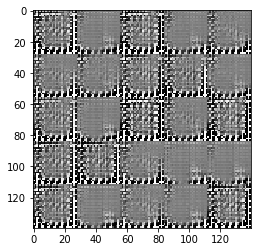

Epoch 2/2... Discriminator Loss: 0.3397... Generator Loss: 6.4253


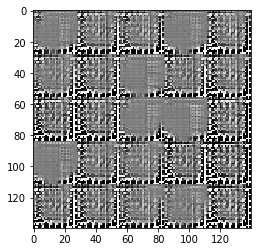

Epoch 2/2... Discriminator Loss: 0.3289... Generator Loss: 6.8537


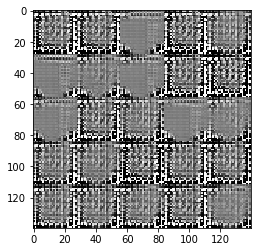

Epoch 2/2... Discriminator Loss: 0.3290... Generator Loss: 6.7243


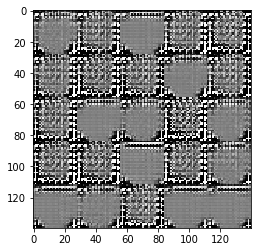

Epoch 2/2... Discriminator Loss: 0.3295... Generator Loss: 6.8953


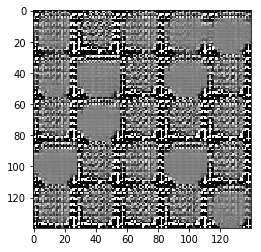

Epoch 2/2... Discriminator Loss: 0.3296... Generator Loss: 7.0447


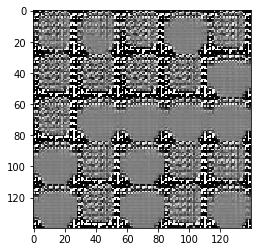

Epoch 2/2... Discriminator Loss: 0.3275... Generator Loss: 7.1573


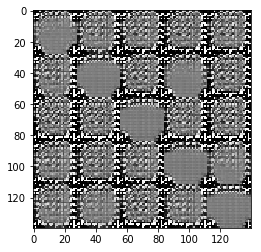

Epoch 2/2... Discriminator Loss: 0.3270... Generator Loss: 7.6611


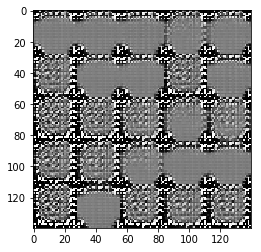

Epoch 2/2... Discriminator Loss: 0.3274... Generator Loss: 7.4532


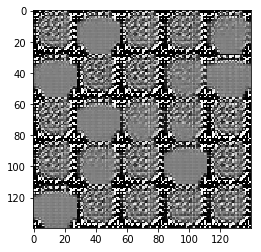

Epoch 2/2... Discriminator Loss: 0.3336... Generator Loss: 7.5454


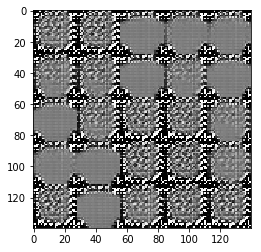

Epoch 2/2... Discriminator Loss: 0.3287... Generator Loss: 7.8001
Done.................


In [56]:
batch_size = 32 
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5



data_dir = './data'
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2
#mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

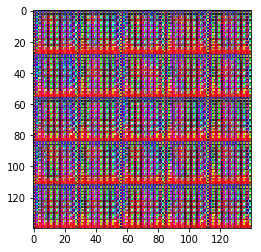

Epoch 1/1... Discriminator Loss: 0.3785... Generator Loss: 9.4622


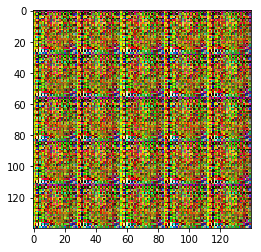

Epoch 1/1... Discriminator Loss: 0.3272... Generator Loss: 9.5527


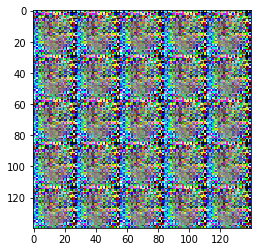

Epoch 1/1... Discriminator Loss: 0.3542... Generator Loss: 7.2796


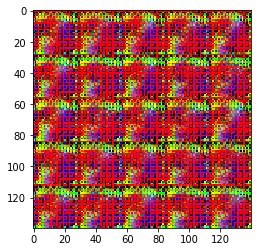

Epoch 1/1... Discriminator Loss: 7.7737... Generator Loss: 0.1019


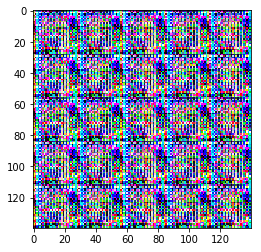

Epoch 1/1... Discriminator Loss: 0.3357... Generator Loss: 6.5527


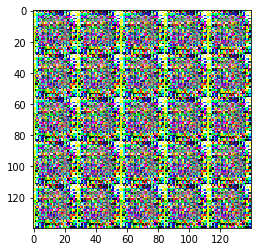

Epoch 1/1... Discriminator Loss: 0.3766... Generator Loss: 6.7793


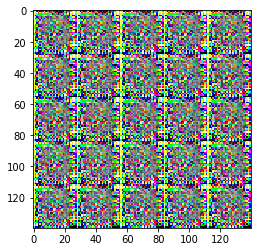

Epoch 1/1... Discriminator Loss: 0.3279... Generator Loss: 7.4388


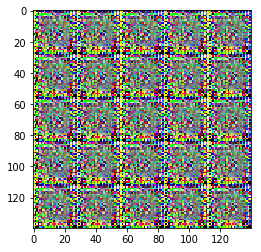

Epoch 1/1... Discriminator Loss: 0.3279... Generator Loss: 7.1411


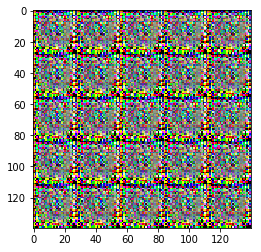

Epoch 1/1... Discriminator Loss: 0.3289... Generator Loss: 7.7193


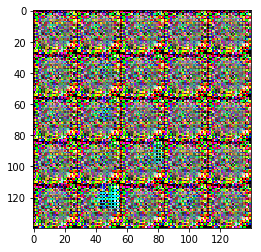

Epoch 1/1... Discriminator Loss: 0.3314... Generator Loss: 6.0219


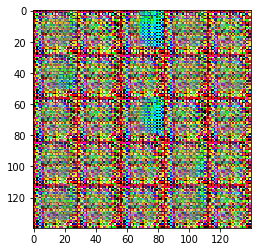

Epoch 1/1... Discriminator Loss: 0.3352... Generator Loss: 7.0798


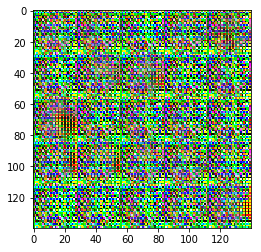

Epoch 1/1... Discriminator Loss: 0.3292... Generator Loss: 5.8008


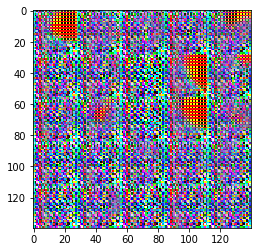

Epoch 1/1... Discriminator Loss: 0.3755... Generator Loss: 5.9861


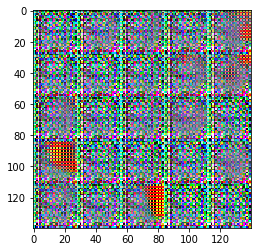

Epoch 1/1... Discriminator Loss: 0.3321... Generator Loss: 6.1653


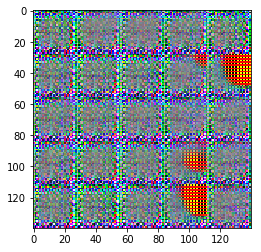

Epoch 1/1... Discriminator Loss: 0.3289... Generator Loss: 6.9521


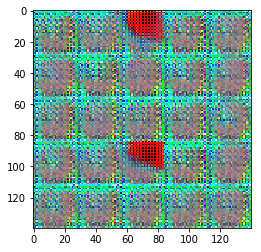

Epoch 1/1... Discriminator Loss: 0.3281... Generator Loss: 6.4092


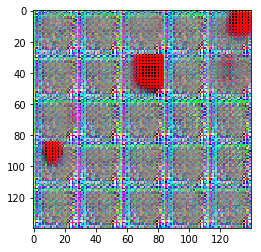

Epoch 1/1... Discriminator Loss: 0.3333... Generator Loss: 5.9170


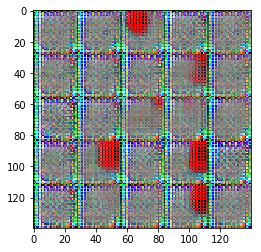

Epoch 1/1... Discriminator Loss: 0.3319... Generator Loss: 6.6038


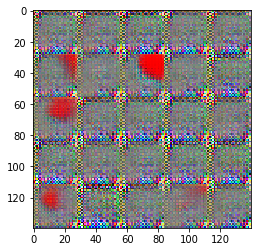

Epoch 1/1... Discriminator Loss: 0.3273... Generator Loss: 7.1810


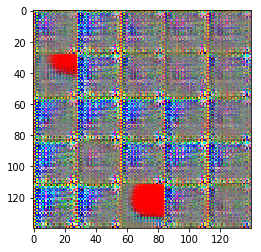

Epoch 1/1... Discriminator Loss: 0.3306... Generator Loss: 5.9801


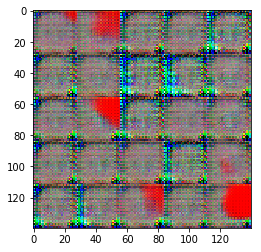

Epoch 1/1... Discriminator Loss: 0.3321... Generator Loss: 5.8550


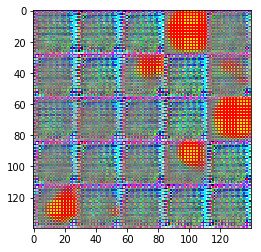

Epoch 1/1... Discriminator Loss: 0.3281... Generator Loss: 7.1764


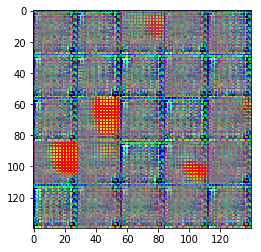

Epoch 1/1... Discriminator Loss: 0.3298... Generator Loss: 6.1633


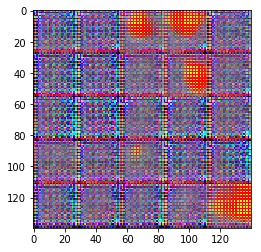

Epoch 1/1... Discriminator Loss: 0.3264... Generator Loss: 7.6585


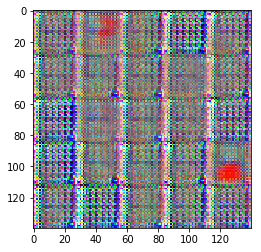

Epoch 1/1... Discriminator Loss: 0.3270... Generator Loss: 7.5259


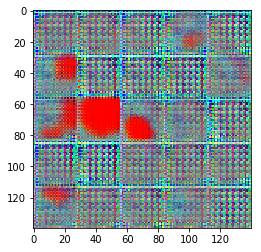

Epoch 1/1... Discriminator Loss: 0.3273... Generator Loss: 6.9228


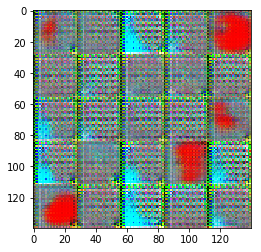

Epoch 1/1... Discriminator Loss: 0.3265... Generator Loss: 7.7505


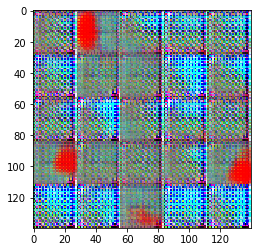

Epoch 1/1... Discriminator Loss: 0.3279... Generator Loss: 7.0816


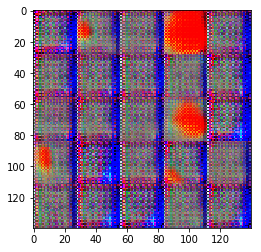

Epoch 1/1... Discriminator Loss: 0.3277... Generator Loss: 7.2004


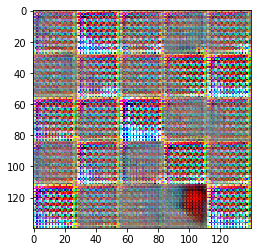

Epoch 1/1... Discriminator Loss: 0.3319... Generator Loss: 7.6587


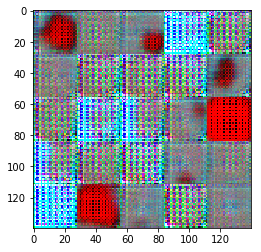

Epoch 1/1... Discriminator Loss: 0.3269... Generator Loss: 7.5207


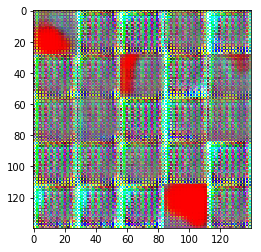

Epoch 1/1... Discriminator Loss: 0.3312... Generator Loss: 8.0204


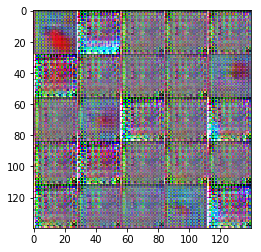

Epoch 1/1... Discriminator Loss: 0.3291... Generator Loss: 6.4036


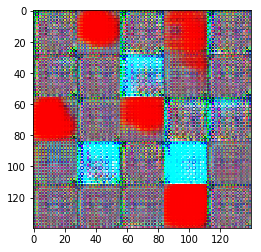

Epoch 1/1... Discriminator Loss: 0.3264... Generator Loss: 7.6737


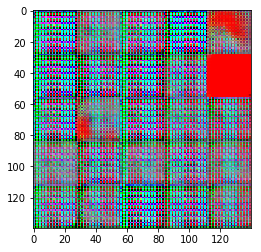

Epoch 1/1... Discriminator Loss: 0.3336... Generator Loss: 5.3319


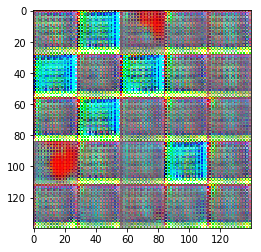

Epoch 1/1... Discriminator Loss: 0.3267... Generator Loss: 7.2284


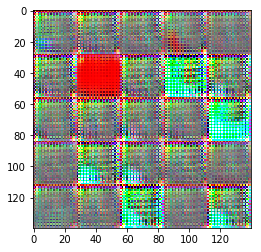

Epoch 1/1... Discriminator Loss: 0.3263... Generator Loss: 8.6233


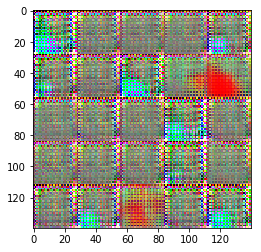

Epoch 1/1... Discriminator Loss: 0.3305... Generator Loss: 8.5954


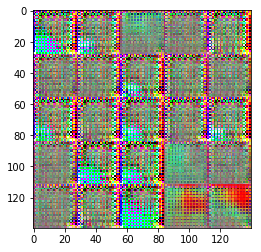

Epoch 1/1... Discriminator Loss: 0.3261... Generator Loss: 7.8720


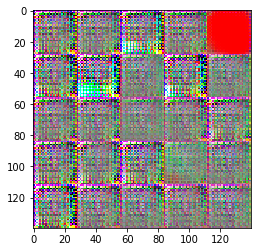

Epoch 1/1... Discriminator Loss: 0.3259... Generator Loss: 8.4284


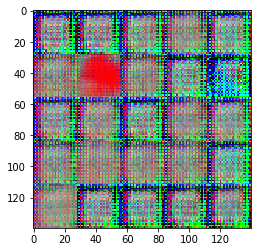

Epoch 1/1... Discriminator Loss: 0.4794... Generator Loss: 6.3859


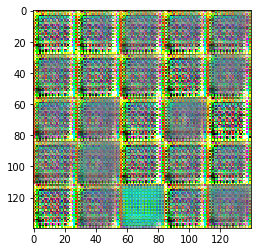

Epoch 1/1... Discriminator Loss: 0.3266... Generator Loss: 7.2305


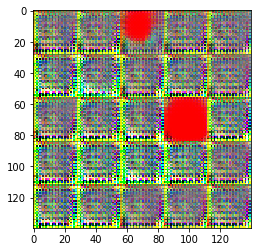

Epoch 1/1... Discriminator Loss: 0.3263... Generator Loss: 7.9895


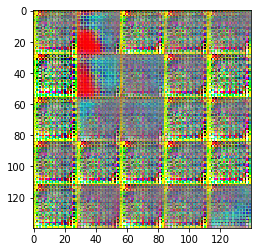

Epoch 1/1... Discriminator Loss: 0.3271... Generator Loss: 8.2988


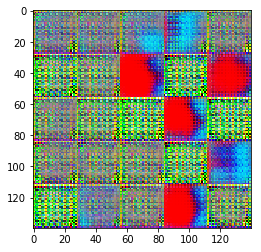

Epoch 1/1... Discriminator Loss: 0.3272... Generator Loss: 7.5421


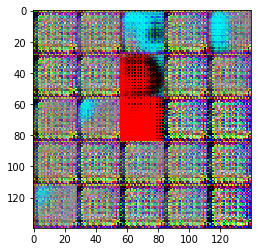

Epoch 1/1... Discriminator Loss: 0.3265... Generator Loss: 7.9769


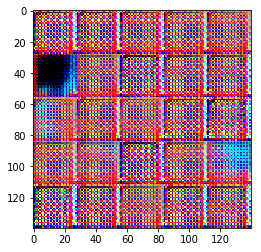

Epoch 1/1... Discriminator Loss: 0.3317... Generator Loss: 5.6766


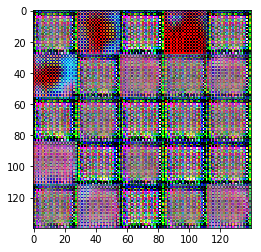

Epoch 1/1... Discriminator Loss: 0.3303... Generator Loss: 6.4145


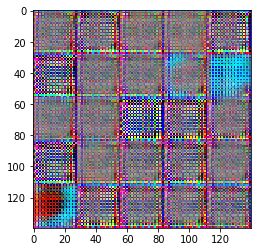

Epoch 1/1... Discriminator Loss: 0.3280... Generator Loss: 6.7040


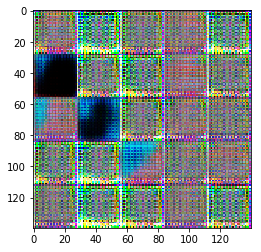

Epoch 1/1... Discriminator Loss: 0.3273... Generator Loss: 6.8398


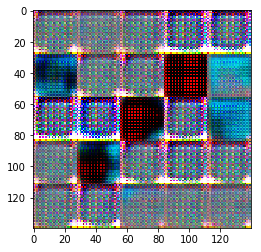

Epoch 1/1... Discriminator Loss: 0.3290... Generator Loss: 6.5806


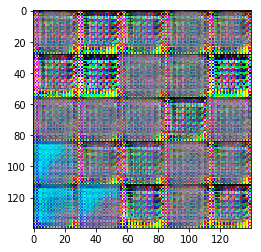

Epoch 1/1... Discriminator Loss: 0.3271... Generator Loss: 7.3034


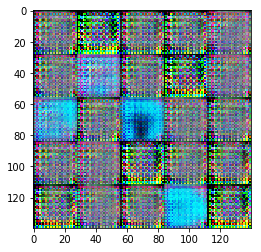

Epoch 1/1... Discriminator Loss: 0.3263... Generator Loss: 7.6018


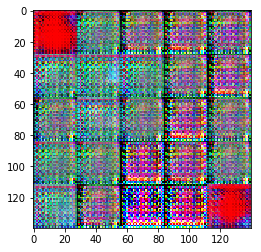

Epoch 1/1... Discriminator Loss: 0.3363... Generator Loss: 6.8629


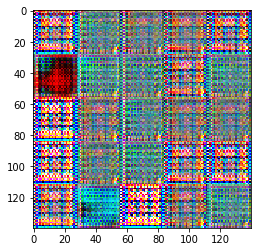

Epoch 1/1... Discriminator Loss: 0.3284... Generator Loss: 6.2333


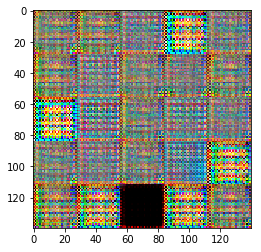

Epoch 1/1... Discriminator Loss: 0.3578... Generator Loss: 6.1686


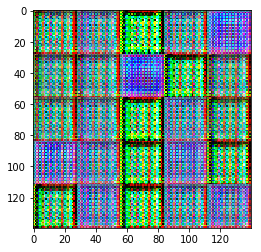

Epoch 1/1... Discriminator Loss: 0.3311... Generator Loss: 5.8995


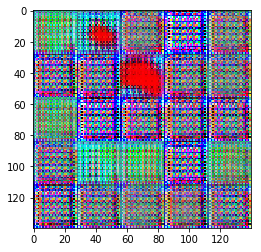

Epoch 1/1... Discriminator Loss: 0.3273... Generator Loss: 6.4341


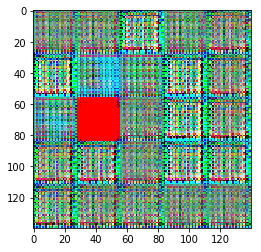

Epoch 1/1... Discriminator Loss: 0.3675... Generator Loss: 6.0330


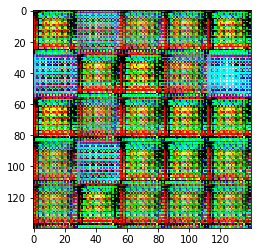

Epoch 1/1... Discriminator Loss: 0.3268... Generator Loss: 7.0339


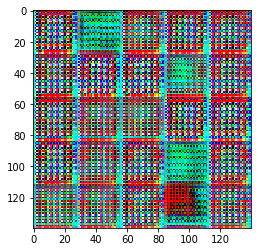

Epoch 1/1... Discriminator Loss: 0.3281... Generator Loss: 6.1873


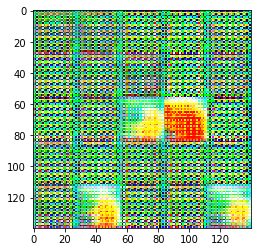

Epoch 1/1... Discriminator Loss: 0.3273... Generator Loss: 6.5690


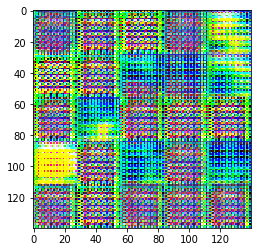

Epoch 1/1... Discriminator Loss: 0.3270... Generator Loss: 6.7358
Done.................


In [55]:
batch_size = 32
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.